In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,RobustScaler,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import math
import pylab as pl
import scipy.stats as st


In [4]:
#loading the dataset
data = pd.read_csv('.\\CAR DETAILS FROM CAR DEKHO.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.info()

data.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           4340 non-null   str  
 1   year           4340 non-null   int64
 2   selling_price  4340 non-null   int64
 3   km_driven      4340 non-null   int64
 4   fuel           4340 non-null   str  
 5   seller_type    4340 non-null   str  
 6   transmission   4340 non-null   str  
 7   owner          4340 non-null   str  
dtypes: int64(3), str(5)
memory usage: 271.4 KB


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
data =  data.drop(['name'], axis=1) #dropping name column as it is not useful for our model
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


<Axes: ylabel='km_driven'>

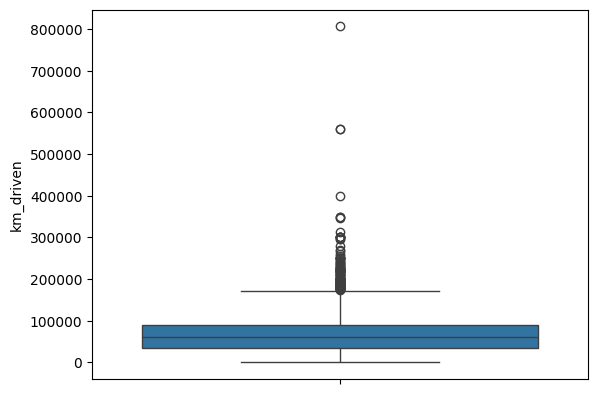

In [8]:
sns.boxplot(data=data["km_driven"]) #checking for outliers in km_driven column


<Axes: ylabel='selling_price'>

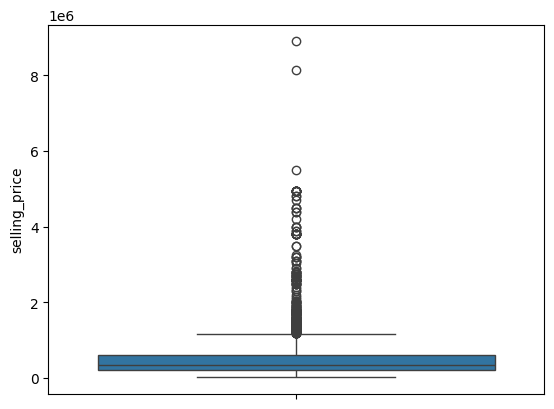

In [9]:
sns.boxplot(data=data["selling_price"])#checking for outliers in selling_price column


In [10]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = remove_outliers(data, "km_driven")
data = remove_outliers(data, "selling_price")


In [11]:
#ordinal encoding set
Transimission_Category = ['Automatic' , 'Manual']
Owner_order = ['First Owner', 'Second Owner','Third Owner' ,'Fourth & Above Owner','Test Drive Car'] 


#preprocessing
processing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year', 'km_driven']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['fuel', 'seller_type']),
        ('ord', OrdinalEncoder(categories=[Transimission_Category, Owner_order]), ['transmission', 'owner'])
    ])

In [12]:
#splitting the data into features and target variable
X = data.drop('selling_price', axis=1)
y = np.log1p(data["selling_price"]) 

y.head()


0    11.002117
1    11.813037
2    13.304687
3    12.429220
4    13.017005
Name: selling_price, dtype: float64

In [13]:
#splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#pipeline for linear regression model
LR = LinearRegression()
model = Pipeline(steps=[('preprocessor', processing), ('model', LR)])


In [15]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [16]:
model.predict(X_test)

array([12.79738824, 11.60370458, 13.02696573, 12.87947494, 12.80510338,
       11.88679345, 12.8739401 , 13.10351758, 12.79738824, 13.41746701,
       12.25414932, 12.99567246, 12.16208839, 12.51458736, 12.80880518,
       11.76785915, 13.18788953, 12.98872884, 13.09328794, 13.17477379,
       12.26186446, 13.042396  , 12.46459473, 13.05009424, 12.87471161,
       12.64822018, 12.80510338, 13.17652147, 11.83698385, 11.03812632,
       13.14560965, 12.98531503, 12.55639383, 12.75760833, 12.69787401,
       12.73616171, 13.28339042, 11.23634871, 12.99258641, 11.72605268,
       13.33108681, 11.55708599, 12.89260982, 12.02428385, 12.23071591,
       12.59867132, 12.70900295, 13.0460978 , 13.77792409, 13.41293061,
       12.70944671, 13.03097907, 13.09811698, 12.64822018, 13.14159869,
       12.59481375, 13.10891817, 12.84753665, 12.73230414, 12.51800116,
       13.10398049, 12.78537177, 12.64417958, 13.23543302, 12.86622496,
       13.41293061, 13.07188551, 12.20063793, 13.05381294, 12.45

In [17]:
#evaluating the model

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse) 
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.17483432626452977
R-squared: 0.6795306421679805
Mean Absolute Error: 0.3172967331373413
Root Mean Squared Error: 0.4181319483901341


In [18]:
residuals = y_test - y_pred

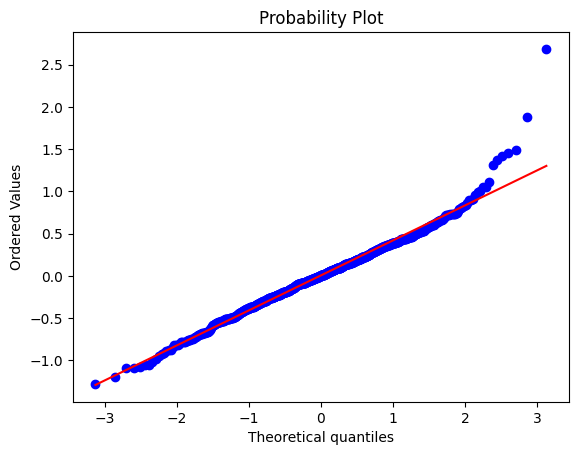

In [19]:
st.probplot(y_test - y_pred, dist="norm", plot=pl)
pl.show()

In [20]:
from sklearn.model_selection import cross_val_score


Cross_Validation = cross_val_score(model, X_train, y_train , cv=5 , scoring='r2')

In [21]:
Cross_Validation

array([0.64495618, 0.65530642, 0.62277665, 0.64291505, 0.64474253])

I applied a log transformation using np.log1p(data["selling_price"]) to improve the model’s predictive performance. After training the model on the transformed target variable, I observed an improvement in the R² score.

However, when using the original selling_price without transformation, the model achieves an R² score of approximately 0.5